## Focus on NKT2a cells

In [1]:
# Import useful modules

import numpy as np
import pandas as pd
import scanpy as sc
import os
#import igraph
import matplotlib.pyplot as plt
import seaborn

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=130)

/home/lebrigand/.conda/envs/jupyter/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.4.1 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1


In [2]:
adata_ann = sc.read_h5ad('./output/wt.ann.h5ad')
adata_raw = sc.read_h5ad('./output/wt.preprocessing.h5ad')
adata_raw.shape

(3290, 12958)

In [3]:
tokeep = adata_ann.obs['cell_type'] == ['NKT2a']
list_of_cell_names = adata_ann.obs_names[tokeep]
adata = adata_raw[list_of_cell_names, ]
adata.obs['cell_type'] = adata_ann.obs['cell_type']
adata.shape

Trying to set attribute `.obs` of view, making a copy.


(245, 12958)

In [4]:
sc.pp.filter_genes(adata, min_cells=3)
adata.X.shape

filtered out 2568 genes that are detectedin less than 3 cells


(245, 10390)

In [5]:
adata.obs

,sample,n_genes,percent_mito,percent_ribo,n_counts,doublet_scores,predicted_doublets,doubletDetection,cell_type
index,,,,,,,,,
AAACGGGTCTGGTGTA-1,wt,1642,0.039274,0.357213,3062.0,0.070213,False,0.0,NKT2a
AAAGATGTCTTCTGGC-1,wt,3593,0.024929,0.331563,10687.0,0.074197,False,0.0,NKT2a
AAAGTAGAGTTAACGA-1,wt,2163,0.030691,0.402455,4256.0,0.056985,False,0.0,NKT2a
AAATGCCTCGTCTGAA-1,wt,2346,0.026147,0.366514,5312.0,0.088384,False,0.0,NKT2a
AACTCTTGTTCAGGCC-1,wt,2604,0.022605,0.336854,6929.0,0.172113,False,0.0,NKT2a
...,...,...,...,...,...,...,...,...,...
TTGCCGTAGATGTCGG-1,wt,2468,0.019977,0.510030,5726.0,0.049208,False,0.0,NKT2a
TTGGAACTCCACGAAT-1,wt,3669,0.021102,0.374002,11320.0,0.107195,False,0.0,NKT2a
TTTATGCAGCAGGTCA-1,wt,2031,0.029957,0.362373,4207.0,0.078522,False,0.0,NKT2a


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


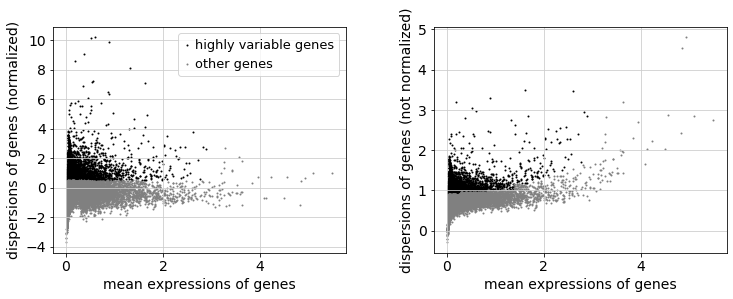

2466

In [6]:
#hvgs = adata_ko.var['highly_variable'].intersection(adata_wt.var['highly_variable'])
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)
np.sum(adata.var['highly_variable'])

In [7]:
sc.pp.scale(adata, max_value=10)

In [8]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:00)


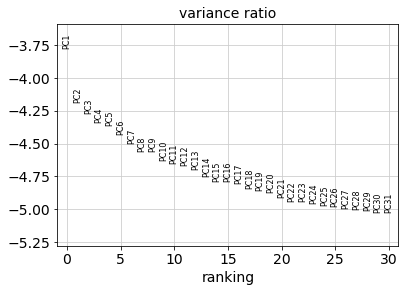

In [9]:
sc.pl.pca_variance_ratio(adata, log=True)

In [10]:
sc.pp.neighbors(adata, n_pcs = 6)

computing neighbors
    using 'X_pca' with n_pcs = 6
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:01)


In [11]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


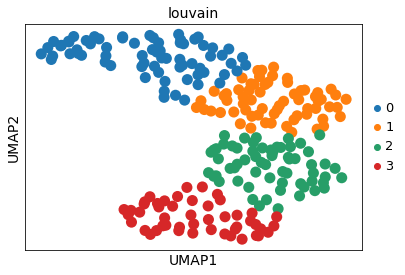

In [12]:
sc.tl.louvain(adata, resolution=0.4)
sc.pl.umap(adata, color=['louvain'])

In [13]:
sc.tl.rank_genes_groups(adata, groupby = 'louvain')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [14]:
cell_type_nb = {}
list_cell_type = adata.obs['louvain'].unique().tolist()
list_cell_type.sort()
for i in range(0, len(adata.obs['louvain'].unique().tolist())):
    cell_type_nb[list_cell_type[i]] = i


clusters = []
genes = []
logFC = []
score = []
pvals = []
pvals_adj = []

for cl in cell_type_nb.keys():
    clusters = clusters + ([cell_type_nb[cl]]*len(adata.uns['rank_genes_groups']['names'][str(cl)]))
    genes = genes + adata.uns['rank_genes_groups']['names'][str(cl)].tolist()
    logFC = logFC + adata.uns['rank_genes_groups']['logfoldchanges'][str(cl)].tolist()
    score = score + adata.uns['rank_genes_groups']['scores'][str(cl)].tolist()
    pvals = pvals + adata.uns['rank_genes_groups']['pvals'][str(cl)].tolist()
    pvals_adj = pvals_adj + adata.uns['rank_genes_groups']['pvals_adj'][str(cl)].tolist()
    
    
markers = pd.DataFrame(data = {'clusters': clusters,
                              'genes':genes,
                              'logFC':logFC,
                              'score':score,
                              'pvals':pvals,
                              'pvals_adj':pvals_adj,
                              })

markers.to_csv(path_or_buf = 'markers.sub.nkt2a.tsv', sep = '\t', index = False)

pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

,0,1,2,3
0,Shisa5,Smpdl3a,H2afz,Ung
1,Malat1,Sepw1,Ppia,Dek
2,Ltb,Eif3e,Ranbp1,Stmn1
3,Btg1,Eef1a1,Ptma,Hells
4,Ms4a4b,Eif3h,Nme1,Gmnn
5,AW112010,Eef2,Pomp,Dut
6,Ypel3,Ubb,Atp5j,Hmgb2
7,Tpt1,Limd2,Ndufa4,Ptma
8,H2-K1,Ctss,2700094K13Rik,Lig1
9,Gm9843,Id3,Hmgn2,Tipin


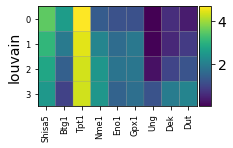

GridSpec(2, 3, height_ratios=[0, 10.5], width_ratios=[2.88, 0, 0.2])

In [15]:
markers_genes = ['Shisa5','Btg1','Tpt1','Nme1','Eno1','Gpx1','Ung','Dek','Dut']
sc.pl.matrixplot(adata, markers_genes, groupby='louvain')

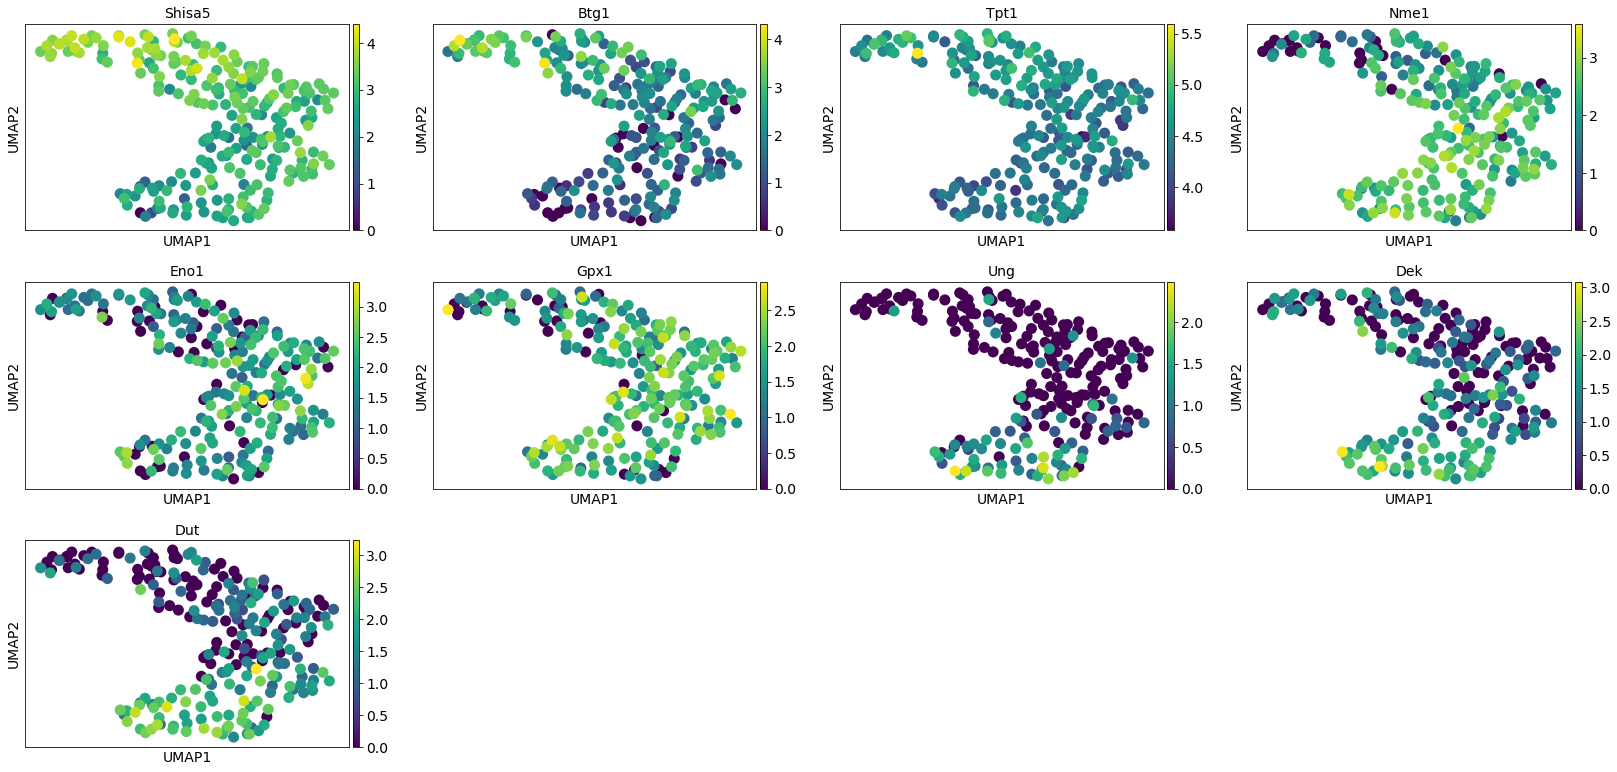

In [16]:
sc.pl.umap(adata, color=markers_genes)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain']`


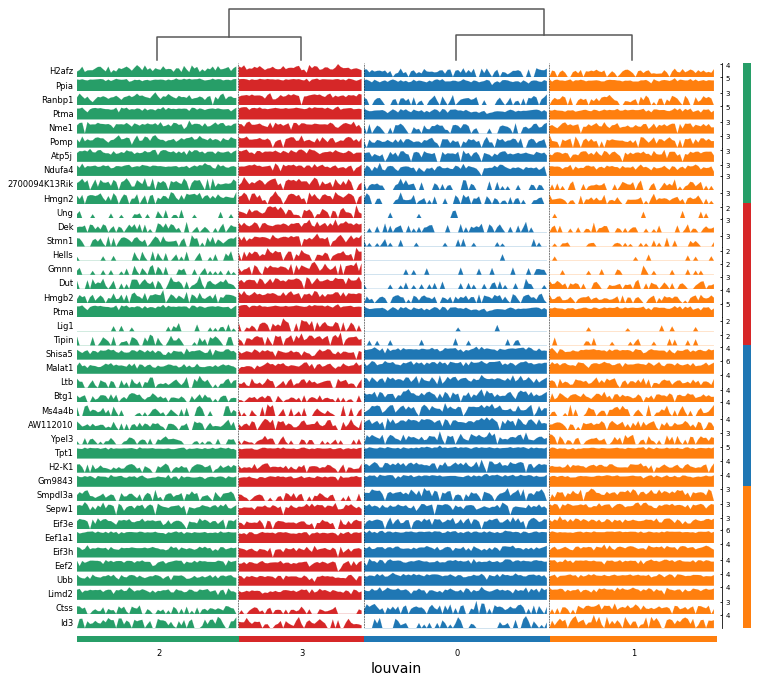

In [17]:
sc.pl.rank_genes_groups_tracksplot(adata, n_genes=10)

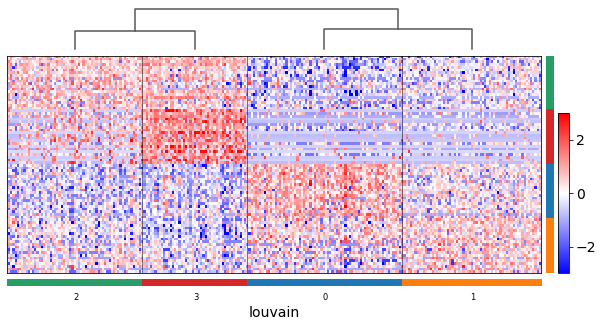

In [18]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=20, key='rank_genes_groups',
                                swap_axes=True, use_raw=False, vmax=3, vmin=-3, cmap='bwr', dendrogram=True)